# 使用scipy.io下载 .mat文件
得到的是字典格式，键值对

In [1]:
import scipy.io as scio

E1 = scio.loadmat('data\\S1_E1.mat')
E2 = scio.loadmat('data\\S1_E2.mat')
E3 = scio.loadmat('data\\S1_E3.mat')
E4 = scio.loadmat('data\\S1_E4.mat')

print(E1.keys())
print(E2.keys())
print(E3.keys())
print(E4.keys())

dict_keys(['__header__', '__version__', '__globals__', 'emg', 'label'])
dict_keys(['__header__', '__version__', '__globals__', 'emg', 'label'])
dict_keys(['__header__', '__version__', '__globals__', 'emg', 'label'])
dict_keys(['__header__', '__version__', '__globals__', 'emg', 'label'])


# 合并E1，E2，E3，E4数据

In [2]:
import numpy as np

E1_emg = E1['emg']
E2_emg = E2['emg']
E3_emg = E3['emg']
E4_emg = E4['emg']

E1_label = E1['label']
E2_label = E2['label']
E3_label = E3['label']
E4_label = E4['label']

index1 =[]
for i in range(len(E1_label)):
    if E1_label[i]!=0:
        index1.append(i)
label1 = E1_label[index1,:]
emg1 = E1_emg[index1,:]

index2 =[]
for i in range(len(E2_label)):
    if E2_label[i]!=0:
        index2.append(i)
label2 = E2_label[index2,:]
label2 = label2 + label1[-1,:]
emg2 = E2_emg[index2,:]

index3 =[]
for i in range(len(E3_label)):
    if E3_label[i]!=0:
        index3.append(i)
label3 = E3_label[index3,:]
label3 = label3 + label2[-1,:]
emg3 = E3_emg[index3,:]

index4 =[]
for i in range(len(E4_label)):
    if E4_label[i]!=0:
        index4.append(i)
label4 = E4_label[index4,:]
label4 = label4 + label3[-1,:]
emg4 = E4_emg[index4,:]

emg = np.vstack((emg1,emg2,emg3,emg4))
label = np.vstack((label1,label2,label3,label4))
label = label-1

print(emg.shape)
print(label.shape)

(960095, 6)
(960095, 1)


[[ 0]
 [ 0]
 [ 0]
 ...
 [15]
 [15]
 [15]]


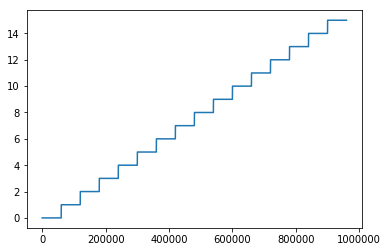

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(label)
print(label)

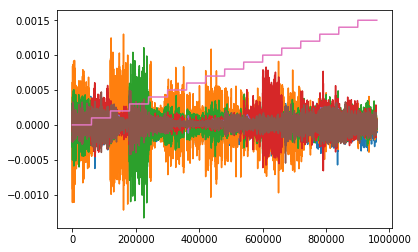

In [4]:
plt.plot(emg)
plt.plot(label*0.0001)

# 提取时域特征

In [5]:
from feature_utils import *  
import math

featureData=[]
featureLabel = []
classes = 16
timeWindow = 200
strideWindow = 200

for i in range(classes):
    index = [];
    for j in range(label.shape[0]):
        if(label[j,:]==i):
            index.append(j)
    iemg = emg[index,:]
    length = math.floor((iemg.shape[0]-timeWindow)/strideWindow)
    print("class ",i, ",number of sample: ",iemg.shape[0],length)
    
    for j in range(length):
        rms = featureRMS(iemg[strideWindow*j:strideWindow*j+timeWindow,:])
        mav = featureMAV(iemg[strideWindow*j:strideWindow*j+timeWindow,:])
        wl  = featureWL( iemg[strideWindow*j:strideWindow*j+timeWindow,:])
        zc  = featureZC( iemg[strideWindow*j:strideWindow*j+timeWindow,:])
        ssc = featureSSC(iemg[strideWindow*j:strideWindow*j+timeWindow,:])
        
        featureStack = np.hstack((rms,mav,wl,zc,ssc))
        
        featureData.append(featureStack)
        featureLabel.append(i)
featureData = np.array(featureData)

print(featureData.shape)
print(len(featureLabel))

class  0 ,number of sample:  60006 299
class  1 ,number of sample:  60006 299
class  2 ,number of sample:  60006 299
class  3 ,number of sample:  60006 299
class  4 ,number of sample:  60006 299
class  5 ,number of sample:  60005 299
class  6 ,number of sample:  60006 299
class  7 ,number of sample:  60006 299
class  8 ,number of sample:  60006 299
class  9 ,number of sample:  60006 299
class  10 ,number of sample:  60006 299
class  11 ,number of sample:  60006 299
class  12 ,number of sample:  60006 299
class  13 ,number of sample:  60006 299
class  14 ,number of sample:  60006 299
class  15 ,number of sample:  60006 299
(4784, 30)
4784


# 构造成图像数据

In [6]:
imageData=[]
imageLabel=[]
imageLength=200

for i in range(classes):
    index = [];
    for j in range(label.shape[0]):
        if(label[j,:]==i):
            index.append(j)
            
    iemg = emg[index,:]
    length = math.floor((iemg.shape[0]-imageLength)/imageLength)
    print("class ",i," number of sample: ",iemg.shape[0],length)
    
    for j in range(length):
        subImage = iemg[imageLength*j:imageLength*(j+1),:]
        imageData.append(subImage)
        imageLabel.append(i)
        
imageData = np.array(imageData)
print(imageData.shape)
print(len(imageLabel))        

class  0  number of sample:  60006 299
class  1  number of sample:  60006 299
class  2  number of sample:  60006 299
class  3  number of sample:  60006 299
class  4  number of sample:  60006 299
class  5  number of sample:  60005 299
class  6  number of sample:  60006 299
class  7  number of sample:  60006 299
class  8  number of sample:  60006 299
class  9  number of sample:  60006 299
class  10  number of sample:  60006 299
class  11  number of sample:  60006 299
class  12  number of sample:  60006 299
class  13  number of sample:  60006 299
class  14  number of sample:  60006 299
class  15  number of sample:  60006 299
(4784, 200, 6)
4784


# 保存h5文件

In [7]:
import h5py
file = h5py.File('DB3//DB3_S1_feature.h5','w')  
file.create_dataset('featureData', data = featureData)  
file.create_dataset('featureLabel', data = featureLabel)  
file.close()  

file = h5py.File('DB3//DB3_S1_image.h5','w')  
file.create_dataset('imageData', data = imageData)  
file.create_dataset('imageLabel', data = imageLabel)  
file.close()  

D:\Anaconda\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
